In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("4-wheeler-EV-carwale.csv")
df

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name
0,Superb car like as fantastic as petroleum car....,5.0,4.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0,hyundai kona
1,"Anti national, worst service, worst customer c...",1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0,hyundai kona
2,Super happy with it. The car is too good,4.0,5.0,5.0,5.0,4.0,New,Few thousand kilometers,5.0,hyundai kona
3,"Pretty good car, smooth as a glider fast car, ...",5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,hyundai kona
4,Price difference between petrol and electronic...,4.0,4.0,5.0,3.0,2.0,Not Purchased,Haven't driven it,3.0,hyundai kona
...,...,...,...,...,...,...,...,...,...,...
124,A good car but overpriced a little. The starti...,5.0,4.0,4.0,4.0,3.0,New,Did a short drive once,4.0,tata tigor ev
125,Excellent vehicle driving dynamics and EVs are...,5.0,5.0,5.0,5.0,5.0,Not Purchased,Did a short drive once,5.0,tata tigor ev
126,After government subsidy it becomes cheaper th...,5.0,5.0,5.0,5.0,5.0,Not Purchased,Did a short drive once,5.0,tata tigor ev
127,Yes I love tata products .. A true Indian comp...,4.0,4.0,4.0,5.0,5.0,Not Purchased,Haven't driven it,5.0,tata tigor ev


In [3]:
df.drop(["Condition","model_name",'driven'], inplace = True, axis =1)

In [4]:
df[df['rating'] == 0]

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,rating
1,"Anti national, worst service, worst customer c...",1.0,1.0,1.0,1.0,1.0,0.0
40,Good car with good safety and comfort with all...,5.0,5.0,5.0,5.0,5.0,0.0
45,Bought Nexon EV on 28-5-21. Next day onwards I...,1.0,1.0,1.0,1.0,1.0,0.0
65,Very much expensive on-road price for Nexon ev...,4.0,4.0,4.0,4.0,2.0,0.0
76,price high ..charging a double price for placi...,5.0,5.0,3.0,5.0,1.0,0.0
110,"Tata EV has lot of flaws, worst part is servic...",3.0,2.0,1.0,2.0,1.0,0.0
112,Company did not provide slow charging station ...,2.0,2.0,1.0,1.0,1.0,0.0
114,Don't buy & it's a very costly car. Not the be...,1.0,1.0,1.0,1.0,1.0,0.0
122,Riding experience was okay. It still makes a l...,3.0,4.0,3.0,5.0,3.0,0.0


In [5]:
df = df[df['rating'] != 0]
df.shape


(120, 7)

In [6]:
df = df[~((df['rating'] != 1) & (df['Exterior'] == 0))]
df

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,rating
0,Superb car like as fantastic as petroleum car....,5.0,4.0,5.0,5.0,5.0,5.0
2,Super happy with it. The car is too good,4.0,5.0,5.0,5.0,4.0,5.0
3,"Pretty good car, smooth as a glider fast car, ...",5.0,5.0,5.0,5.0,5.0,5.0
4,Price difference between petrol and electronic...,4.0,4.0,5.0,3.0,2.0,3.0
5,"Except for the short legroom in the rear, this...",5.0,3.0,5.0,5.0,4.0,5.0
...,...,...,...,...,...,...,...
124,A good car but overpriced a little. The starti...,5.0,4.0,4.0,4.0,3.0,4.0
125,Excellent vehicle driving dynamics and EVs are...,5.0,5.0,5.0,5.0,5.0,5.0
126,After government subsidy it becomes cheaper th...,5.0,5.0,5.0,5.0,5.0,5.0
127,Yes I love tata products .. A true Indian comp...,4.0,4.0,4.0,5.0,5.0,5.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, 0 to 128
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review           119 non-null    object 
 1   Exterior         119 non-null    float64
 2   Comfort          119 non-null    float64
 3   Performance      119 non-null    float64
 4   Fuel Economy     119 non-null    float64
 5   Value for Money  119 non-null    float64
 6   rating           119 non-null    float64
dtypes: float64(6), object(1)
memory usage: 7.4+ KB


In [8]:
df.describe()

,Exterior,Comfort,Performance,Fuel Economy,Value for Money,rating
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,4.638655,4.579832,4.621849,4.579832,4.378151,4.663866
std,0.647434,0.753476,0.833530,0.848686,1.096926,0.739644
min,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [9]:
df.duplicated().any()

False

In [10]:
numerical_cols = ['Exterior', 'Comfort', 'Performance', 'Fuel Economy', 'Value for Money', 'rating']
numeric_df = df[numerical_cols]
scaler = MinMaxScaler()
numeric_arr = scaler.fit_transform(numeric_df)
numeric_df = pd.DataFrame(numeric_arr, columns = numerical_cols)
numeric_df

,Exterior,Comfort,Performance,Fuel Economy,Value for Money,rating
0,1.00,0.75,1.00,1.00,1.00,1.000000
1,0.75,1.00,1.00,1.00,0.75,1.000000
2,1.00,1.00,1.00,1.00,1.00,1.000000
3,0.75,0.75,1.00,0.50,0.25,0.333333
4,1.00,0.50,1.00,1.00,0.75,1.000000
...,...,...,...,...,...,...
114,1.00,0.75,0.75,0.75,0.50,0.666667
115,1.00,1.00,1.00,1.00,1.00,1.000000
116,1.00,1.00,1.00,1.00,1.00,1.000000
117,0.75,0.75,0.75,1.00,1.00,1.000000


C:\Users\devam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\devam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


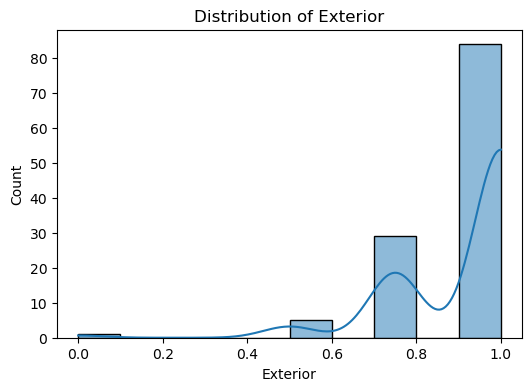

C:\Users\devam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\devam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


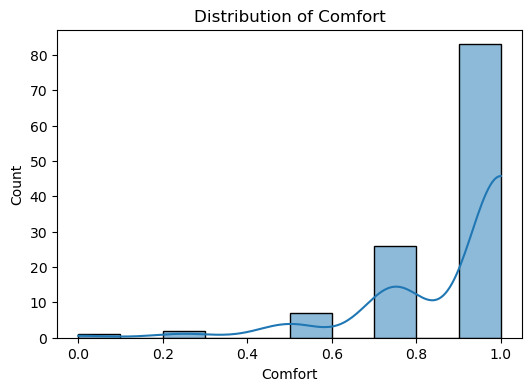

C:\Users\devam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\devam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


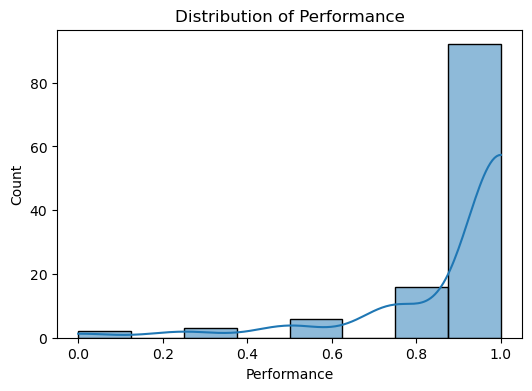

C:\Users\devam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\devam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


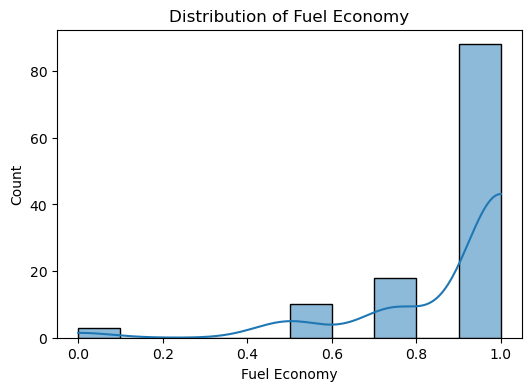

C:\Users\devam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\devam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


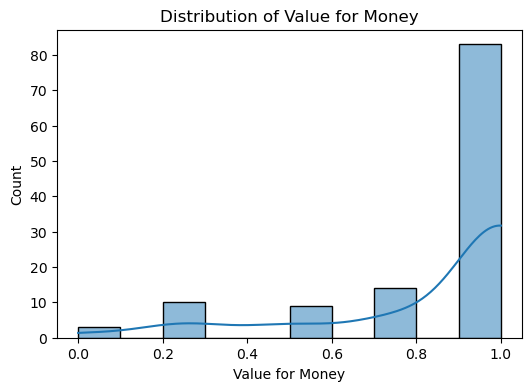

C:\Users\devam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\devam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


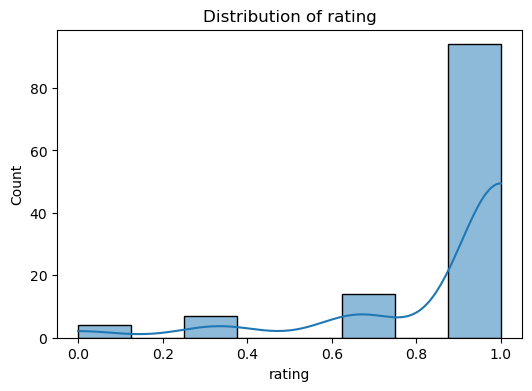

C:\Users\devam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\devam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\devam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\devam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

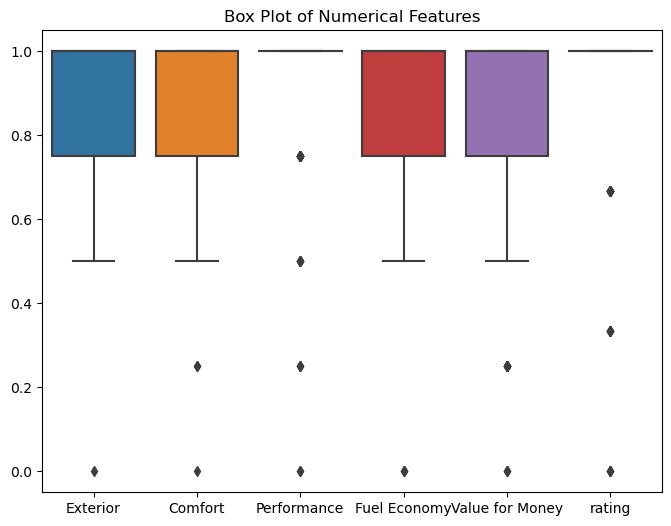

In [11]:
# Histogram 
for col in numeric_df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(numeric_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Box plot 
plt.figure(figsize=(8, 6))
sns.boxplot(data=numeric_df)
plt.title('Box Plot of Numerical Features')
plt.show()


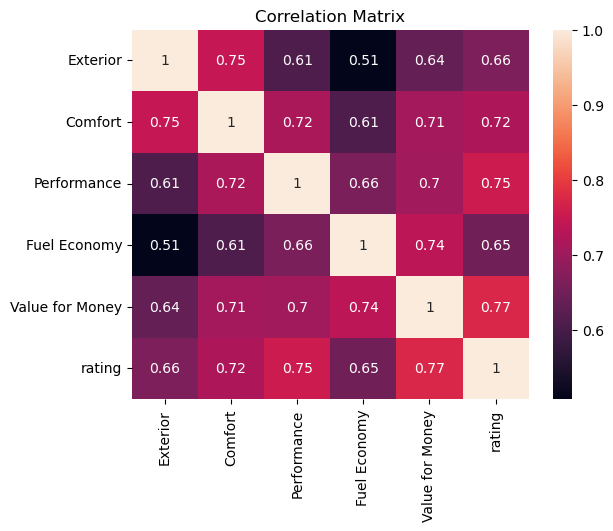

In [12]:
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_df)
pca_result
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca.explained_variance_ratio_


array([0.75504487, 0.07511348])

C:\Users\devam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\devam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\devam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\devam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

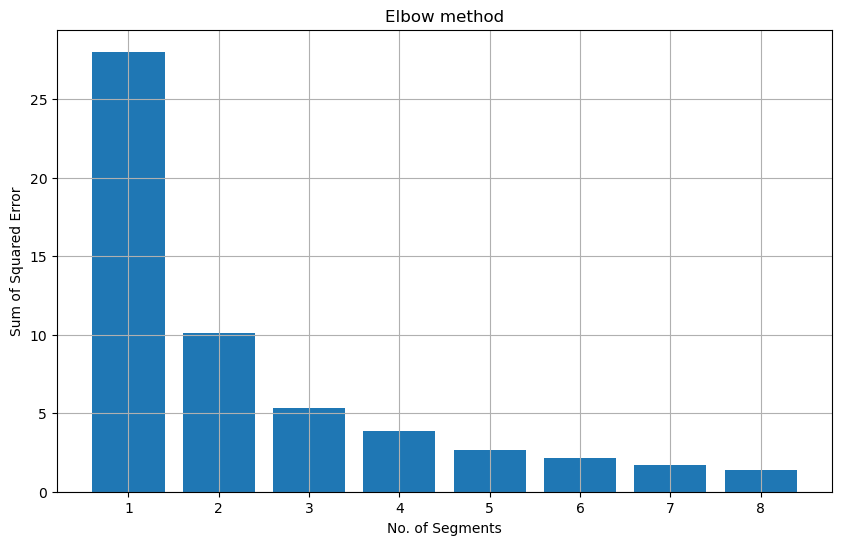

[28.02695211431218,
 10.126227685423725,
 5.360134186933543,
 3.8907716600760742,
 2.627790597845115,
 2.139190633385529,
 1.6736791351136127,
 1.409815715582547]

In [14]:
clusters_range = range(1, 9)
inertia = []

for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=1234)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.bar(clusters_range, inertia)
plt.xlabel('No. of Segments')
plt.ylabel('Sum of Squared Error')
plt.title('Elbow method')
plt.grid(True)
plt.show()
inertia

In [15]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_df)

pca_df['Cluster'] = kmeans.labels_ + 1 
numeric_df['Cluster'] = kmeans.labels_ + 1


C:\Users\devam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\devam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
pca_df

,PC1,PC2,Cluster
0,-0.188155,-0.092211,1
1,-0.071613,0.000174,1
2,-0.273672,-0.001389,1
3,0.792104,0.226706,3
4,0.033257,-0.080770,1
...,...,...,...
114,0.433039,0.116059,3
115,-0.273672,-0.001389,1
116,-0.273672,-0.001389,1
117,-0.025794,-0.245579,1


C:\Users\devam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\devam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\devam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


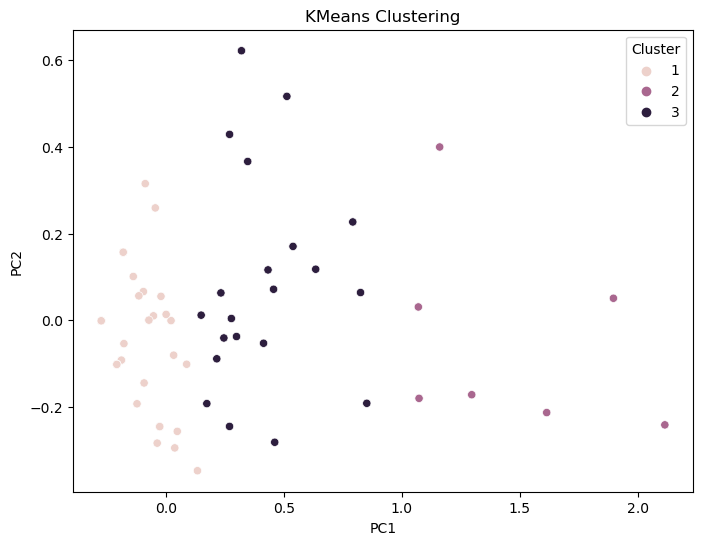

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df)
# sns.scatterplot(x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], color= 'purple', marker = '+', s = 100)
plt.title('KMeans Clustering')
plt.show()


In [18]:
import pandas as pd

cluster_profiles = numeric_df.groupby('Cluster').mean()
cluster_profiles

,Exterior,Comfort,Performance,Fuel Economy,Value for Money,rating
Cluster,,,,,,
1,0.961538,0.958791,0.980769,0.969780,0.978022,0.978022
2,0.535714,0.357143,0.321429,0.321429,0.142857,0.142857
3,0.809524,0.797619,0.773810,0.761905,0.500000,0.746032


In [19]:
df['Cluster'] = numeric_df['Cluster']
df

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,rating,Cluster
0,Superb car like as fantastic as petroleum car....,5.0,4.0,5.0,5.0,5.0,5.0,1.0
2,Super happy with it. The car is too good,4.0,5.0,5.0,5.0,4.0,5.0,1.0
3,"Pretty good car, smooth as a glider fast car, ...",5.0,5.0,5.0,5.0,5.0,5.0,3.0
4,Price difference between petrol and electronic...,4.0,4.0,5.0,3.0,2.0,3.0,1.0
5,"Except for the short legroom in the rear, this...",5.0,3.0,5.0,5.0,4.0,5.0,1.0
...,...,...,...,...,...,...,...,...
124,A good car but overpriced a little. The starti...,5.0,4.0,4.0,4.0,3.0,4.0,NaN
125,Excellent vehicle driving dynamics and EVs are...,5.0,5.0,5.0,5.0,5.0,5.0,NaN
126,After government subsidy it becomes cheaper th...,5.0,5.0,5.0,5.0,5.0,5.0,NaN
127,Yes I love tata products .. A true Indian comp...,4.0,4.0,4.0,5.0,5.0,5.0,NaN


In [20]:
# pd.set_option('display.max_colwidth', None)  

grouped_reviews = df.groupby('Cluster')['review'].apply(lambda x: ' '.join(x)).reset_index()
grouped_reviews

,Cluster,review
0,1.0,Superb car like as fantastic as petroleum car....
1,2.0,This is very important segment in our Indian c...
2,3.0,"Pretty good car, smooth as a glider fast car, ..."


In [21]:
df2 = pd.read_csv("2-wheeler-EV-bikewale.csv")
df2

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,Scooty is ok but 250 motor power is less. So t...,Daily Commute,> 1 yr,< 5000 kms,2,2.0,2.0,NaN,2.0,NaN,2.0,NaN,3.0,Gemopai Ryder
840,"Superb scooty. good look, Many color options ....",Everything,< 3 months,< 5000 kms,5,5.0,5.0,5.0,5.0,5.0,NaN,5.0,NaN,Gemopai Ryder
841,"Up to 2 years the condition was good,\nAfter 2...",Daily Commute,> 1 yr,5000-10000 kms,2,2.0,2.0,4.0,2.0,3.0,NaN,1.0,NaN,Gemopai Ryder
842,"Compare to other scooters it is a best bike, c...",Daily Commute,3-6 months,< 5000 kms,5,4.0,4.0,NaN,NaN,NaN,4.0,NaN,5.0,Gemopai Ryder


In [22]:
df2.drop(["Used it for", "Owned for", "Ridden for", "Model Name"], inplace = True, axis = 1)

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              797 non-null    object 
 1   rating              844 non-null    int64  
 2   Visual Appeal       739 non-null    float64
 3   Reliability         716 non-null    float64
 4   Performance         345 non-null    float64
 5   Service Experience  703 non-null    float64
 6   Extra Features      185 non-null    float64
 7   Comfort             530 non-null    float64
 8   Maintenance cost    180 non-null    float64
 9   Value for Money     390 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 66.1+ KB


C:\Users\devam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\devam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Performance', ylabel='Count'>

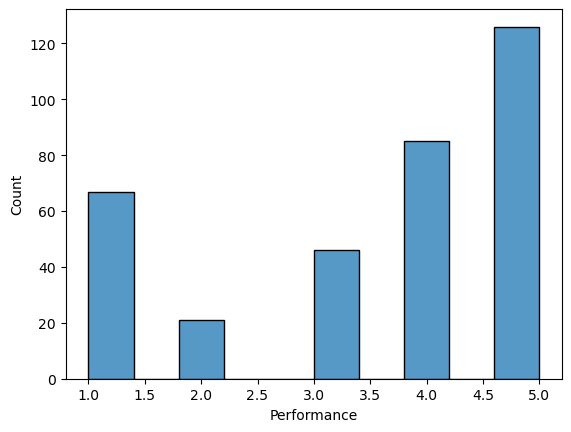

In [24]:
sns.histplot(df2['Performance'])

In [25]:
df2 = df2[~pd.isnull(df2['review'])]
df2

,review,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
0,We all checked the bike's capacity to be 150 k...,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0
1,Performance is very poor on this bike. The cha...,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0
2,I purchased this in April 2022 and the sales s...,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0
3,If any issues come in scooty parts not availab...,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0
4,Don't buy this vehicle unless you have a near ...,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...
839,Scooty is ok but 250 motor power is less. So t...,2,2.0,2.0,NaN,2.0,NaN,2.0,NaN,3.0
840,"Superb scooty. good look, Many color options ....",5,5.0,5.0,5.0,5.0,5.0,NaN,5.0,NaN
841,"Up to 2 years the condition was good,\nAfter 2...",2,2.0,2.0,4.0,2.0,3.0,NaN,1.0,NaN
842,"Compare to other scooters it is a best bike, c...",5,4.0,4.0,NaN,NaN,NaN,4.0,NaN,5.0


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797 entries, 0 to 843
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              797 non-null    object 
 1   rating              797 non-null    int64  
 2   Visual Appeal       694 non-null    float64
 3   Reliability         675 non-null    float64
 4   Performance         341 non-null    float64
 5   Service Experience  661 non-null    float64
 6   Extra Features      185 non-null    float64
 7   Comfort             486 non-null    float64
 8   Maintenance cost    180 non-null    float64
 9   Value for Money     349 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 68.5+ KB


C:\Users\devam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\devam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Visual Appeal', ylabel='Count'>

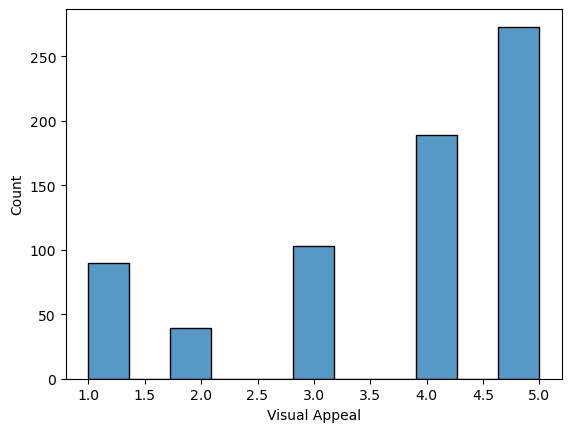

In [27]:
sns.histplot(df2['Visual Appeal'])

In [28]:
df2['Visual Appeal'].fillna(df2['Visual Appeal'].mean(), inplace = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797 entries, 0 to 843
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              797 non-null    object 
 1   rating              797 non-null    int64  
 2   Visual Appeal       797 non-null    float64
 3   Reliability         675 non-null    float64
 4   Performance         341 non-null    float64
 5   Service Experience  661 non-null    float64
 6   Extra Features      185 non-null    float64
 7   Comfort             486 non-null    float64
 8   Maintenance cost    180 non-null    float64
 9   Value for Money     349 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 68.5+ KB


C:\Users\devam\AppData\Local\Temp\ipykernel_25320\3950062176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Visual Appeal'].fillna(df2['Visual Appeal'].mean(), inplace = True)
